# Support Vector Machines

In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import StandardScaler # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix,classification_report # this creates a confusion matrix

In [2]:
df = pd.read_csv('processed.cleveland.data',
                 header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


age,

sex,

cp, chest pain

restbp, resting blood pressure (in mm Hg)

chol, serum cholesterol in mg/dl

fbs, fasting blood sugar

restecg, resting electrocardiographic results

thalach, maximum heart rate achieved

exang, exercise induced angina

oldpeak, ST depression induced by exercise relative to rest

slope, the slope of the peak exercise ST segment.

ca, number of major vessels (0-3) colored by fluoroscopy

thal, this is short of thalium heart scan.

hd, diagnosis of heart disease, the predicted attribute

In [3]:
# Index positions renamed for columns
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# To see problems if there is any wrong type, comparing to the columns values above
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
df.isna().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

In [6]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
len(df[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [9]:
df.shape # seeing total how many so that we consider to remove above

(303, 14)

In [10]:
# Condition changed to "not equal to" to make new df without "?"
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
df_no_missing.shape

(297, 14)

In [11]:
df_no_missing.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

Now we know the problem wuth data is rectified but still the data types shows object

So there is no worry

**Make a two copies of orginal data, one excluding heart disease and one including only heart disease :**

In [12]:
X = df_no_missing.drop('hd', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [13]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

<a id="one-hot-encoding"></a>
# Format the Data Part 2: One-Hot Encoding

Now that we have split the data frame into two pieces, `X`, which contains the data we will use to make, or predict, classifications, and `y`, which contains the known classifications in our training dataset, we need to take a closer look at the variables in `X`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

Now, just to review, let's look at the data types in `X` to remember how python is seeing the data right now.

In [14]:
df["slope"].unique()

array([3., 2., 1.])

CATEGORICAL ENCODING :

In [15]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'],dtype=int)
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [16]:
y.unique()

array([0, 2, 1, 3, 4])

In [17]:
y[y>0] = 1 # Data converted to binary form
y.unique()

array([0, 1])

The Radial Basis Function (RBF) that we are using with our Support Vector Machine assumes that the data are centered and scaled, so we need to do this to both the training and testing datasets.

NOTE: We split the data into training and testing datasets and then scale them separately to avoid Data Leakage. Data Leakage occurs when information about the training dataset currupts or influences the testing dataset.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

**Classifier (making a model)**

In [19]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Default model is tuned no hyperparameters is taken

In [20]:
y_pred = clf_svm.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.94      0.88      0.91        33

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [21]:
y_pred_train = clf_svm.predict(X_train_scaled)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       118
           1       0.94      0.87      0.90       104

    accuracy                           0.91       222
   macro avg       0.91      0.91      0.91       222
weighted avg       0.91      0.91      0.91       222



The gap of not overfit is small here. (train =91, test = 92)

## Optimize Parameters with Cross Validation and GridSearchCV()

Optimizing a Support Vector Machine is all about finding the best value for gamma, and, potentially, the regularization parameter, C. So let's see if we can find better parameters values using cross validation in hope that we can improve the accuracy with the Testing Dataset.

Since we have two parameters to optimize, we will use GridSearchCV(). We specify a bunch of potential values for gamma and C and GridSearchCV() tests all possible combinations of the parameters for us.

Cfloat, default=1.0 Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive

In [22]:
num_features = np.size(X_train_scaled, axis=1)

param_grid = [
  {'C': [1, 10, 100, 1000], # taken these numbers to try and test where the best value falls
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001],
   'kernel': ['rbf','poly']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see:
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )


In [23]:
#Fitting the above model on train data and seeing the best values of parameters we gave it:

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


## Building and Evalutating (Re-instantate the model)

In [24]:
clf_svm = SVC(random_state=42, C=10, gamma=0.0001)

clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.0001, random_state=42)

In [25]:
y_pred = clf_svm.predict(X_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.93      0.85      0.89        33

    accuracy                           0.91        75
   macro avg       0.91      0.90      0.90        75
weighted avg       0.91      0.91      0.91        75



In [26]:
y_predtrain = clf_svm.predict(X_train_scaled)

print(classification_report(y_train,y_predtrain))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       118
           1       0.85      0.77      0.81       104

    accuracy                           0.83       222
   macro avg       0.83      0.83      0.83       222
weighted avg       0.83      0.83      0.83       222



The accuracy is less here compared to before (by1%) but, the gap (safety margin) of not overfit is very large here. (train =83, test = 91)

So we are more sure here that on majority of new data this model will work. 

In [27]:
confusion_matrix(y_test,y_pred)

array([[40,  2],
       [ 5, 28]])

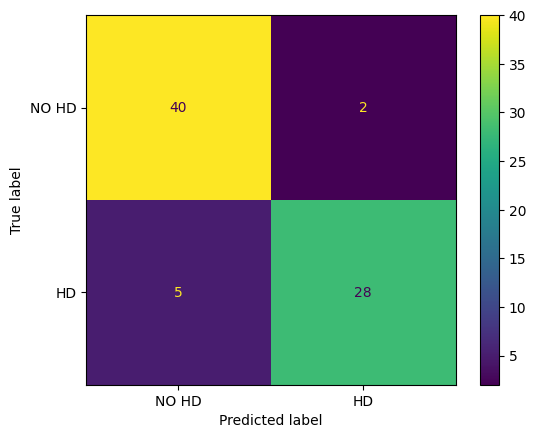

In [28]:
c = confusion_matrix(y_test,y_pred)

from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(c,display_labels=["NO HD", "HD"])
disp.plot()